<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 149.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 157.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 160.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 151.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 167.5 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_305/1501467283.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


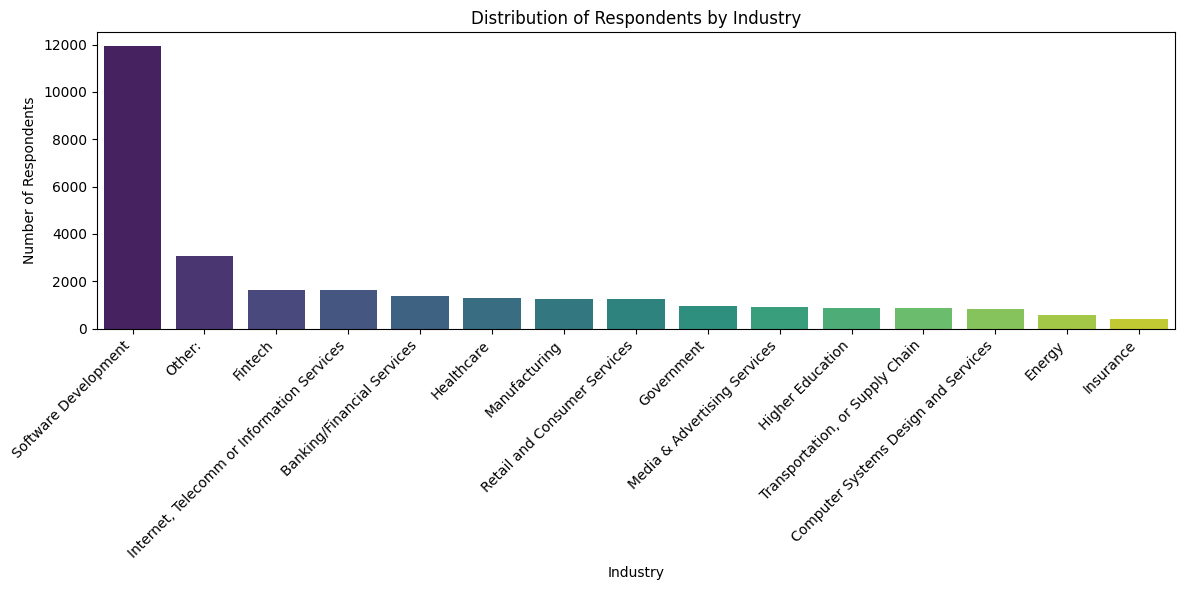

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of respondents per industry
industry_counts = df['Industry'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
##Write your code here
import pandas as pd
import numpy as np

# Calculate basic statistics
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Median Compensation: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

# Define threshold for high compensation outliers (3 standard deviations above mean)
threshold = mean_comp + 3 * std_comp

# Identify outliers
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"Number of high compensation outliers: {high_comp_outliers.shape[0]}")
print(high_comp_outliers[['ConvertedCompYearly']])

Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97
Number of high compensation outliers: 89
       ConvertedCompYearly
529               650000.0
828              1000000.0
1932              945000.0
2171              750000.0
2187             2000000.0
...                    ...
38219            1000000.0
39643            1300000.0
40066             800000.0
40952             750000.0
41027             700000.0

[89 rows x 1 columns]


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


IQR: 75259.5
Lower bound for outliers: -80177.25
Upper bound for outliers: 220860.75
Number of outliers: 978


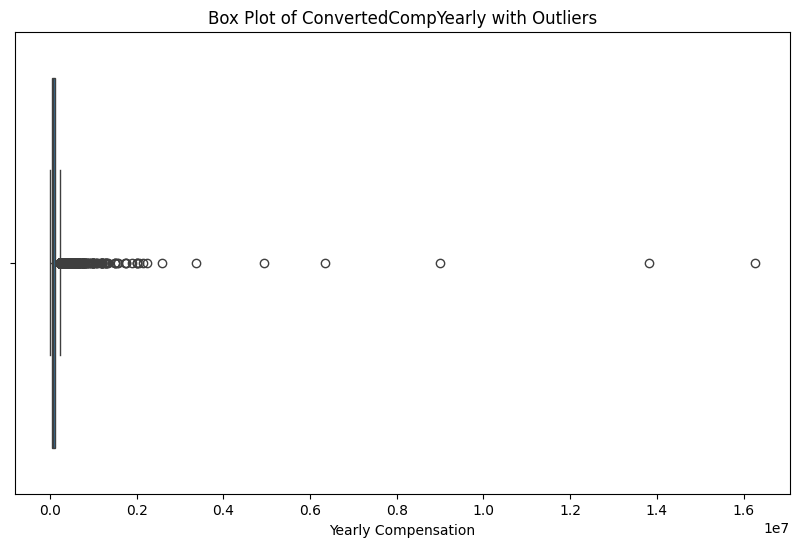

In [7]:
##Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")

# Visualize with box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly with Outliers')
plt.xlabel('Yearly Compensation')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [8]:
##Write your code here


# Create new DataFrame without outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape[0]} rows")
print(f"New DataFrame size without outliers: {df_no_outliers.shape[0]} rows")

Original DataFrame size: 65437 rows
New DataFrame size without outliers: 22457 rows


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Correlation of Age with other numeric variables:
age_numeric            1.000000
WorkExp                0.850044
ConvertedCompYearly    0.122060
JobSat                 0.069509
CompTotal             -0.002778
JobSatPoints_1        -0.027957
ResponseId            -0.038042
JobSatPoints_8        -0.046559
JobSatPoints_6        -0.050721
JobSatPoints_4        -0.076073
JobSatPoints_9        -0.082184
JobSatPoints_7        -0.083344
JobSatPoints_5        -0.101834
JobSatPoints_11       -0.107373
JobSatPoints_10       -0.114740
Name: age_numeric, dtype: float64


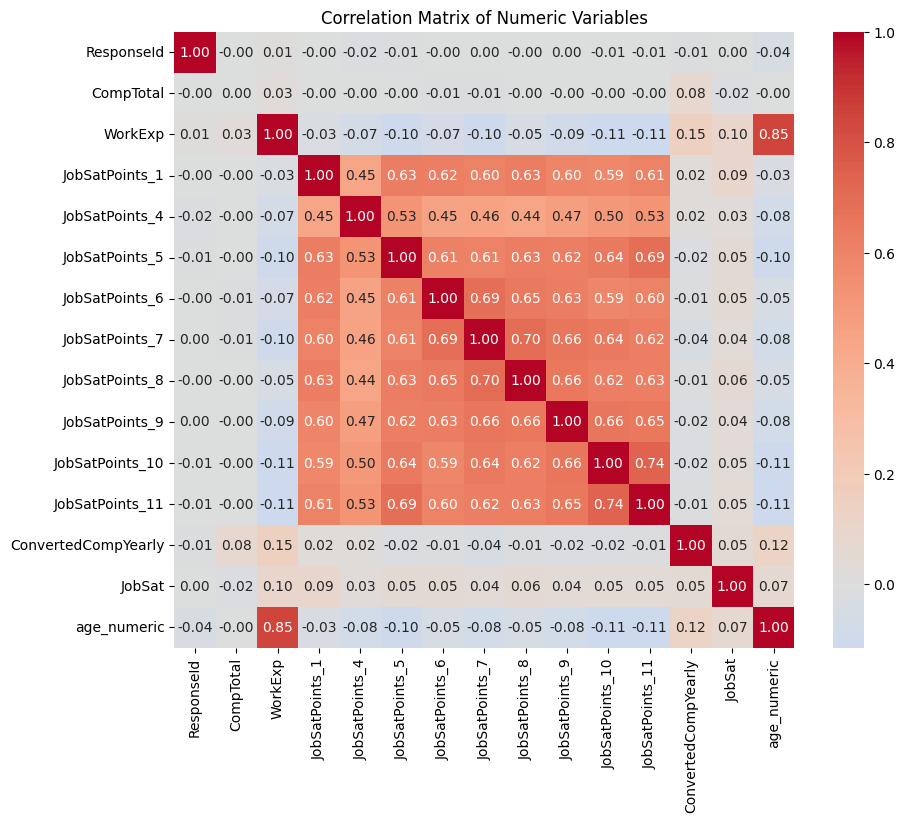

In [14]:
##Write your code here

import re

# Define a function to extract numbers from strings like '44 years old' or '40-49 years old'
def extract_age(age_str):
    if pd.isna(age_str):
        return None
    numbers = re.findall(r'\d+', str(age_str))
    if len(numbers) == 1:
        return int(numbers[0])
    elif len(numbers) == 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    else:
        return None

# Apply the function to create a numeric age column
df['age_numeric'] = df['Age'].apply(extract_age)  # Replace 'age_column' with your actual column name
  
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute correlation matrix for AgeNumeric against other numeric columns
correlations = df[numeric_cols].corr()['age_numeric'].sort_values(ascending=False)

print("Correlation of Age with other numeric variables:")
print(correlations)
import seaborn as sns
import matplotlib.pyplot as plt

# Compute full correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
